In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 7347645-uhd_3840_2160_25fps.mp4 to 7347645-uhd_3840_2160_25fps.mp4
Saving 855081-hd_1920_1080_25fps.mp4 to 855081-hd_1920_1080_25fps.mp4


In [ ]:
!pip install opencv-python


Saving 4226627-hd_1920_1080_30fps.mp4 to 4226627-hd_1920_1080_30fps.mp4


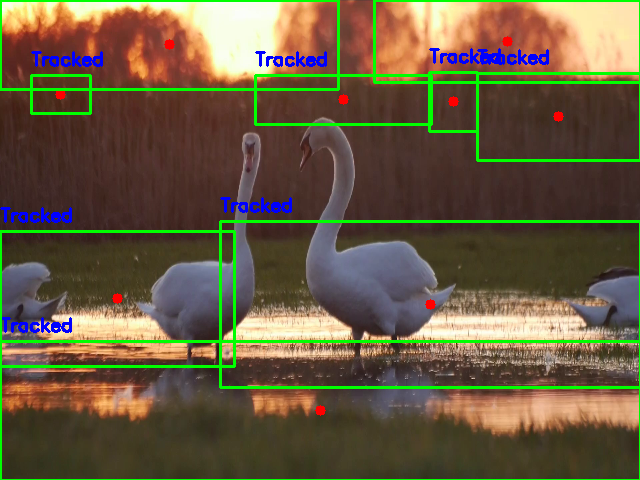

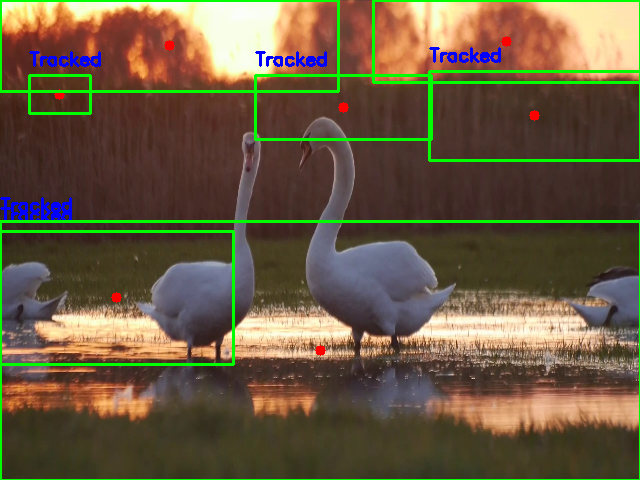

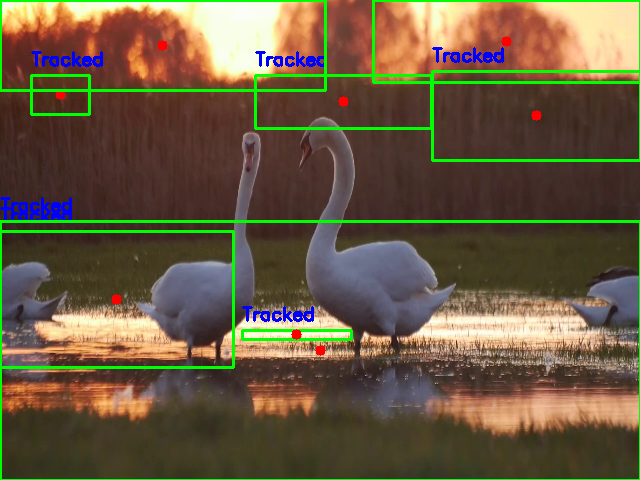

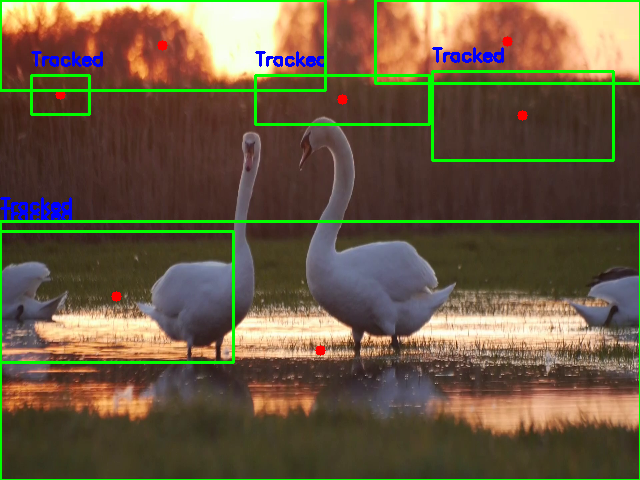

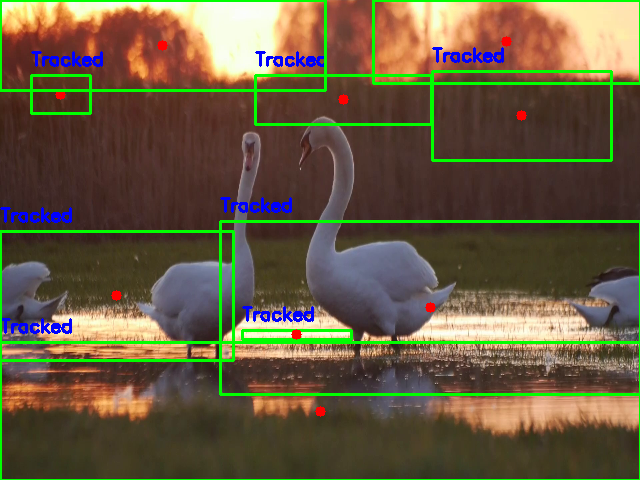

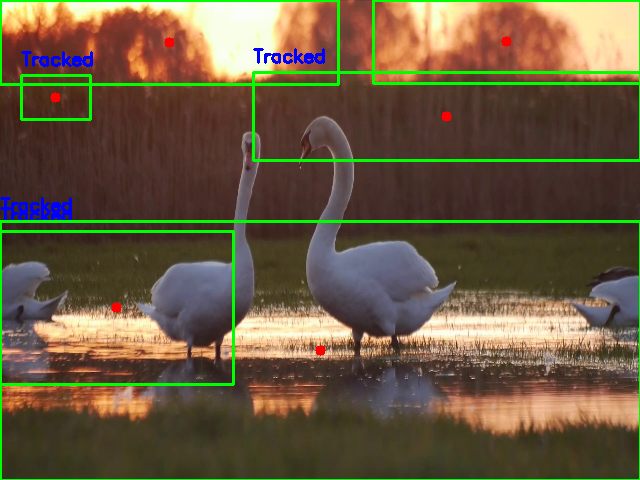

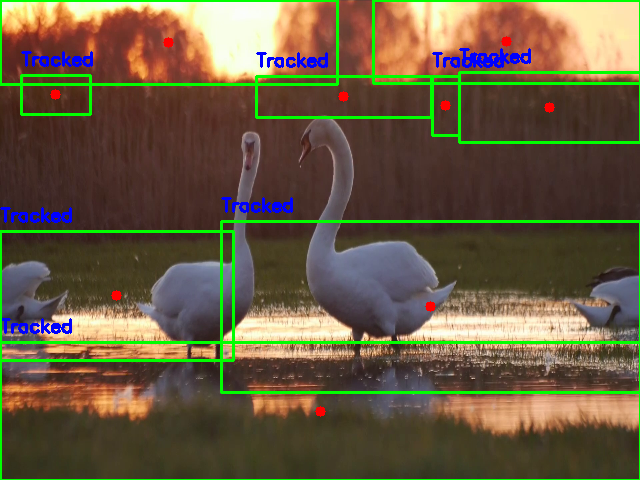

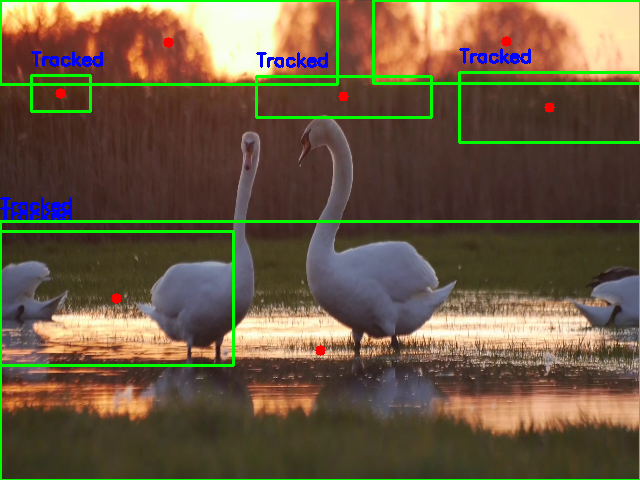

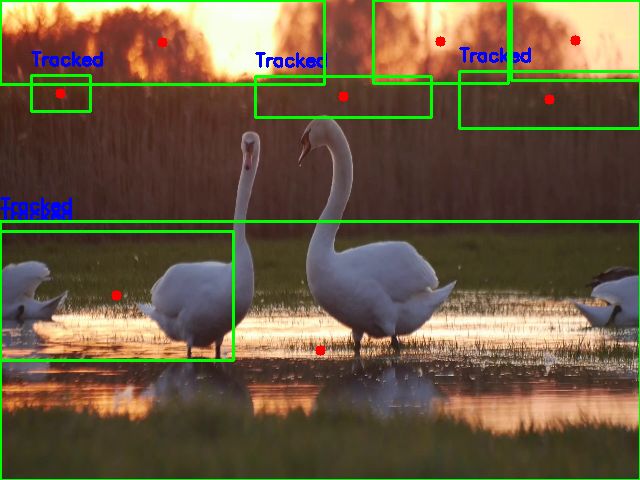

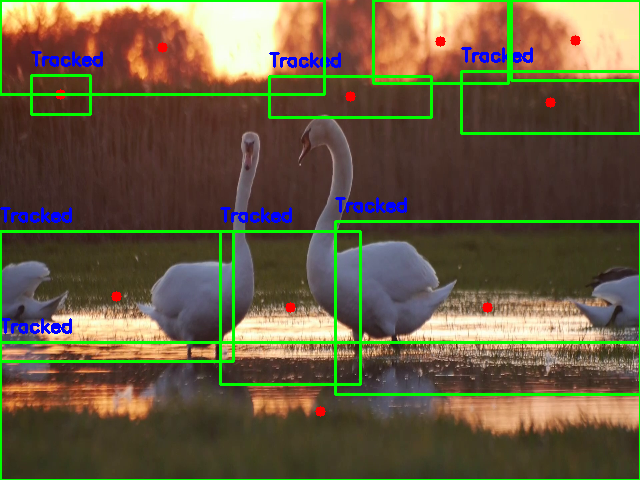

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload the video first
uploaded = files.upload()

# Replace with your actual filename
video_path = list(uploaded.keys())[0]

cap = cv2.VideoCapture(video_path)

# Define color range for tracking (adjust for your animal's color)
lower_color = np.array([10, 50, 50])
upper_color = np.array([30, 255, 255])

frame_count = 0
max_frames = 10  # Number of frames to show

while True:
    ret, frame = cap.read()
    if not ret or frame_count >= max_frames:
        break

    frame = cv2.resize(frame, (640, 480))
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_color, upper_color)

    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 500:
            x, y, w, h = cv2.boundingRect(cnt)
            cx = x + w // 2
            cy = y + h // 2
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.circle(frame, (cx, cy), 5, (0, 0, 255), -1)
            cv2.putText(frame, "Tracked", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    cv2_imshow(frame)
    frame_count += 1

cap.release()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving DSC9209-2.webp to DSC9209-2.webp


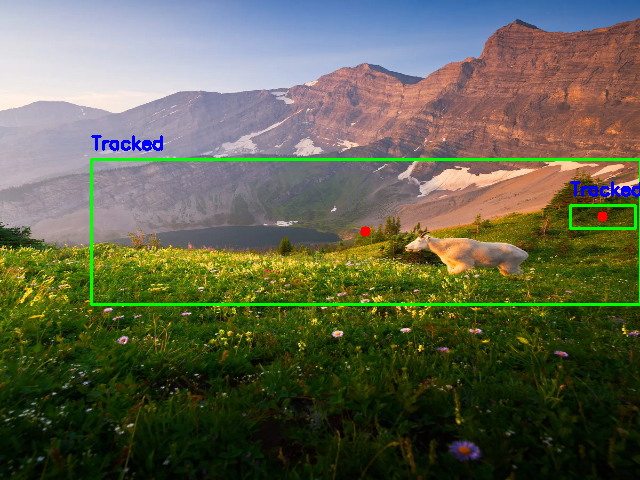

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img_path = next(iter(uploaded))
img = cv2.imread(img_path)
img = cv2.resize(img, (640, 480))
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_color = np.array([10, 50, 50])
upper_color = np.array([30, 255, 255])
mask = cv2.inRange(hsv, lower_color, upper_color)
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 500:
        x, y, w, h = cv2.boundingRect(cnt)
        cx, cy = x + w // 2, y + h // 2
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.circle(img, (cx, cy), 5, (0, 0, 255), -1)
        cv2.putText(img, "Tracked", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

cv2_imshow(img)


In [ ]:
from google.colab import files
uploaded = files.upload()  # Select and upload the image


Saving istockphoto-2148595463-1024x1024.jpg to istockphoto-2148595463-1024x1024.jpg


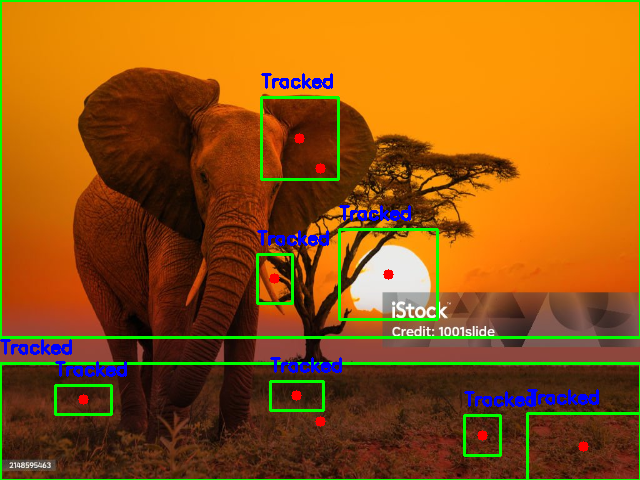

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Automatically get uploaded image filename
img_path = next(iter(uploaded))  # this avoids the NameError

# Read and resize the image
img = cv2.imread(img_path)
img = cv2.resize(img, (640, 480))

# Convert to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Color range for detecting brown/fur tones (adjustable)
lower_color = np.array([10, 50, 50])
upper_color = np.array([30, 255, 255])

# Create mask and detect contours
mask = cv2.inRange(hsv, lower_color, upper_color)
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes and center dots
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 500:
        x, y, w, h = cv2.boundingRect(cnt)
        cx, cy = x + w // 2, y + h // 2
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.circle(img, (cx, cy), 5, (0, 0, 255), -1)
        cv2.putText(img, "Tracked", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Show the final output
cv2_imshow(img)
